In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [3]:
data1 = data['data']
y = data.target

In [4]:
images = data['images']

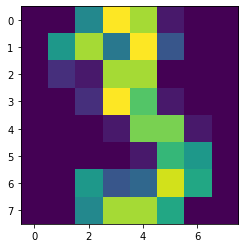

In [5]:
plt.imshow(data1[3].reshape(8,8))

In [6]:
columns = data.feature_names

In [7]:
x = pd.DataFrame(data1,columns = columns)

In [8]:
x.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.3)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier()

In [13]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
dt.score(x_train,y_train)

1.0

In [15]:
dt.predict(x_test.iloc[0].values.reshape(1,64))

C:\Users\ABCD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([6])

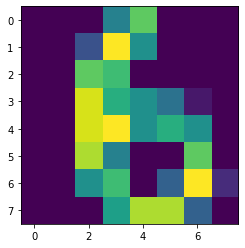

In [16]:
plt.imshow(x_test.values[0].reshape(8,8))

In [17]:
# hyperparameter tunning on dt
from sklearn.model_selection import GridSearchCV

In [18]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6],
    'min_samples_leaf':[10,20,30,40,50]
}

In [19]:
gd = GridSearchCV(dt,param_grid = params,n_jobs = -1,cv = 3)

In [20]:
gd.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 20, 30, 40, 50]})

In [21]:
gd.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10)

In [22]:
gd.best_score_

0.7700875099443119

In [23]:
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=20)

In [24]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=20)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
pred = dt1.predict(x_test)

In [27]:
confusion_matrix(y_test,pred)

array([[48,  0,  0,  0,  4,  1,  0,  0,  0,  0],
       [ 0, 35,  4,  4,  4,  1,  0,  2,  0,  0],
       [ 0,  1, 32,  2,  1,  0,  5,  2,  4,  0],
       [ 0,  1,  1, 39,  0,  2,  0,  5,  1,  5],
       [ 0,  2,  0,  0, 52,  3,  0,  2,  1,  0],
       [ 0,  3,  1,  0,  6, 56,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  3,  0, 49,  0,  0,  0],
       [ 0,  2,  0,  0,  4,  1,  0, 46,  0,  2],
       [ 0,  1,  9,  0,  0,  1,  0,  0, 32,  0],
       [ 0,  5,  1,  2,  2,  1,  0,  1,  2, 45]], dtype=int64)

In [28]:
dt1.score(x_test,y_test),dt1.score(x_train,y_train)

(0.8037037037037037, 0.8257756563245824)

In [29]:
gdr = pd.DataFrame(gd.cv_results_)

In [30]:
gdr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010665,3.770682e-03,0.002666,3.770963e-03,gini,1,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.202864,0.205251,0.200477,0.202864,0.001949,51
1,0.015358,9.045838e-04,0.005332,3.770176e-03,gini,1,20,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.202864,0.205251,0.200477,0.202864,0.001949,51
2,0.012300,3.055272e-03,0.005333,3.771075e-03,gini,1,30,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.202864,0.205251,0.200477,0.202864,0.001949,51
3,0.010664,3.770738e-03,0.002667,3.772087e-03,gini,1,40,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.202864,0.205251,0.200477,0.202864,0.001949,51
4,0.010663,3.772649e-03,0.002666,3.770513e-03,gini,1,50,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.202864,0.205251,0.200477,0.202864,0.001949,51
5,0.010666,3.771075e-03,0.005335,3.772255e-03,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.305489,0.322196,0.324582,0.317422,0.008494,46
6,0.007996,0.000000e+00,0.007998,0.000000e+00,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.305489,0.322196,0.324582,0.317422,0.008494,46
7,0.013333,3.771525e-03,0.002666,3.770738e-03,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.305489,0.322196,0.324582,0.317422,0.008494,46
8,0.013333,3.770851e-03,0.007999,6.531889e-03,gini,2,40,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.305489,0.307876,0.329356,0.314240,0.010732,49
9,0.013330,3.770739e-03,0.005334,3.771581e-03,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.305489,0.298329,0.317422,0.307080,0.007875,50


In [31]:
dt1.predict(x_test.iloc[1].values.reshape(1,64))

C:\Users\ABCD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([9])

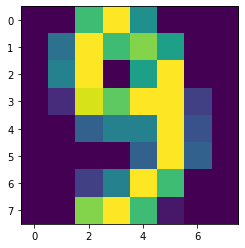

In [32]:
plt.imshow(x_test.iloc[1].values.reshape(8,8))

In [33]:
#lets apply bagging technique

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
l = []
for i in range(10,200,10):
    
    rf = RandomForestClassifier(n_estimators = i,bootstrap = True)
    rf.fit(x_train,y_train)
    sc = rf.score(x_test,y_test)
    l.append((sc,i))
#l.sort(reverse = True)
print(l)
    

[(0.9629629629629629, 10), (0.9611111111111111, 20), (0.9703703703703703, 30), (0.975925925925926, 40), (0.9777777777777777, 50), (0.9740740740740741, 60), (0.9740740740740741, 70), (0.9740740740740741, 80), (0.9722222222222222, 90), (0.9796296296296296, 100), (0.9777777777777777, 110), (0.9777777777777777, 120), (0.9703703703703703, 130), (0.9722222222222222, 140), (0.9777777777777777, 150), (0.975925925925926, 160), (0.9740740740740741, 170), (0.975925925925926, 180), (0.975925925925926, 190)]


In [64]:
rf1 = RandomForestClassifier(n_estimators = 150)

In [65]:
rf1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [66]:
rf1.predict(x_test.iloc[0].values.reshape(1,64))

C:\Users\ABCD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([6])

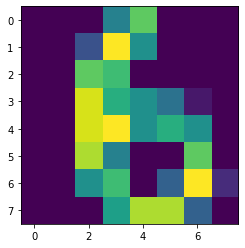

In [67]:
plt.imshow(x_test.iloc[0].values.reshape(8,8))

In [68]:
rf1.score(x_test,y_test),rf1.score(x_train,y_train)

(0.9722222222222222, 1.0)

In [74]:
pred1 = rf1.predict(x_test)

In [76]:
cm = confusion_matrix(y_test,pred1)

In [77]:
import seaborn as sns

<AxesSubplot:>

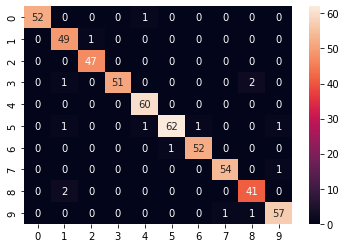

In [81]:
sns.heatmap(cm,annot = True)

In [82]:
from sklearn.metrics import precision_score,recall_score

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].